In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') 
plt.rcParams['font.sans-serif'] = 'SimHei'

In [37]:
columns =['user_id','order_dt','order_products','order_amount']
df = pd.read_table('./data/CDNOW_master.txt',names = columns,sep='\s+')
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [38]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [40]:
#data pre-processing
df['order_date'] = pd.to_datetime(df['order_dt'],format = '%Y%m%d')
#tranform the date format
df['month'] = df['order_date'].astype('datetime64[M]')
#change the accuracny


Text(0.5, 1.0, 'Ordering People numbers in Each Month')

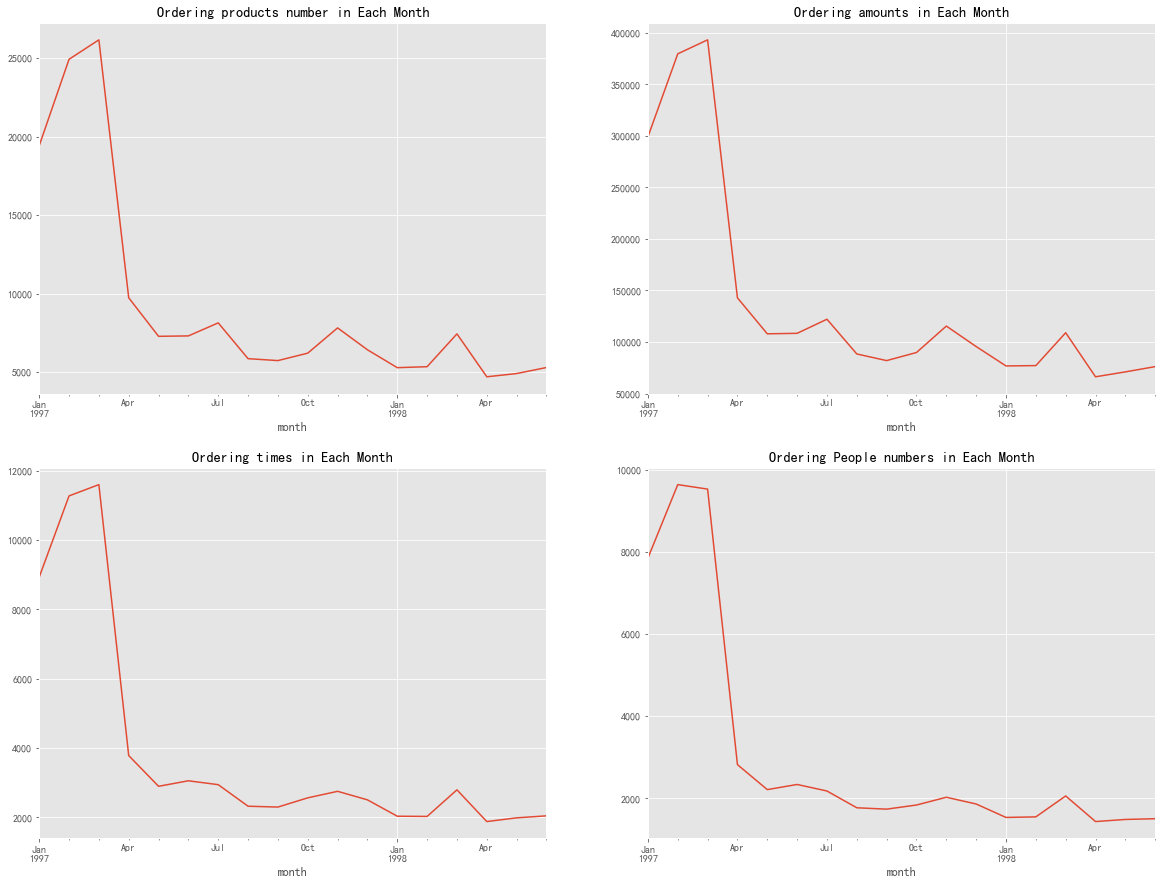

In [41]:
#analyse by month
plt.figure(figsize =(20,15))
plt.subplot(221)
df.groupby(by = 'month')['order_products'].sum().plot()
plt.title('Ordering products number in Each Month')


plt.subplot(222)
df.groupby(by = 'month')['order_amount'].sum().plot()
plt.title('Ordering amounts in Each Month')


plt.subplot(223)
df.groupby(by = 'month')['user_id'].count().plot()
plt.title('Ordering times in Each Month')


plt.subplot(224)
df.groupby(by = 'month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('Ordering People numbers in Each Month')



In [42]:
#Individual Analyse
user_grouped = df.groupby(by = 'user_id').sum()
print(user_grouped.describe())


           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000


<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

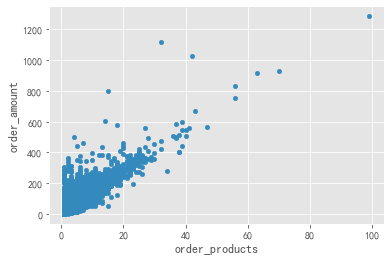

In [43]:
#each customer order amount
df.plot(kind = 'scatter',x = 'order_products',y='order_amount')

<AxesSubplot:xlabel='Each UID Order Amounts', ylabel='Frequency'>

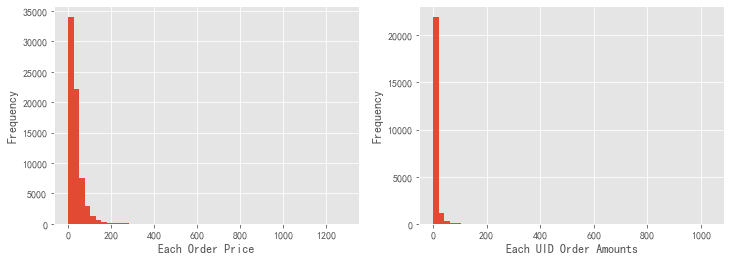

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('Each Order Price')
df['order_amount'].plot(kind = 'hist',bins = 50)


plt.subplot(122)
plt.xlabel('Each UID Order Amounts')
df.groupby(by = 'user_id')['order_products'].sum().plot(kind ='hist',bins = 50)

In [45]:
#find out each id's order amount
user_cumsum = df.groupby(by = 'user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [46]:
#each consumer accmulation
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [47]:
amount_total = user_cumsum['amount_cumsum'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis = 1)
#another way to calculate
user_cumsum['n_prop'] = user_cumsum['amount_cumsum']/amount_total
user_cumsum

,user_id,order_amount,amount_cumsum,prop,n_prop
0,10175,0.00,0.00,0.000000,0.000000
1,4559,0.00,0.00,0.000000,0.000000
2,1948,0.00,0.00,0.000000,0.000000
3,925,0.00,0.00,0.000000,0.000000
4,10798,0.00,0.00,0.000000,0.000000
...,...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405,0.985405
23566,19339,6552.70,2470375.30,0.988025,0.988025
23567,7983,6973.07,2477348.37,0.990814,0.990814
23568,14048,8976.33,2486324.70,0.994404,0.994404


<AxesSubplot:>

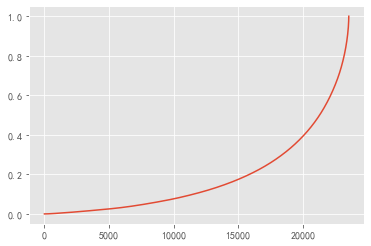

In [48]:
user_cumsum['prop'].plot()

<AxesSubplot:>

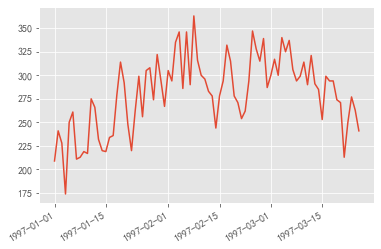

In [49]:
#analyse consumer behavior
#First Time ordering Date
df.groupby(by = 'user_id')['order_date'].min().value_counts().plot()

<AxesSubplot:>

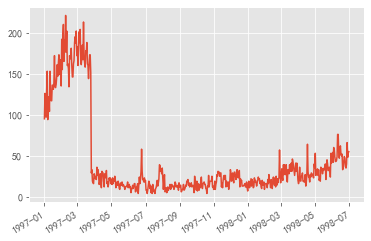

In [50]:
#last date ordering
df.groupby(by = 'user_id')['order_date'].max().value_counts().plot()
#tracking the consumer behavior

RFM Model
R Recency   Last Day Order
F Frequency
M Monetary


In [51]:
#Build RFM MOdel
rfm = df.pivot_table(index = 'user_id',
                    values =['order_products','order_amount','order_date'],
                     aggfunc ={'order_date':'max',#last time order
                              'order_products':'sum',
                               'order_amount':'sum'
                              }
                    )
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [52]:
rfm['R'] = -(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace = True) 
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [53]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x >= 1 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要保留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
    
    
rfm['label']=rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(rfm_func,axis= 1)
rfm.head()




,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


Text(0, 0.5, 'R')

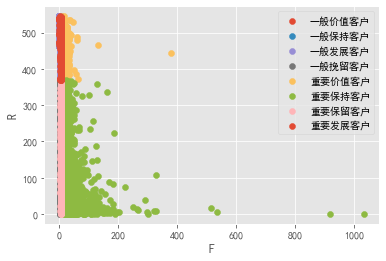

In [54]:
#visulize
for label, grouped in rfm.groupby(by = 'label'):
    x = grouped['F']
    y = grouped['R']
    #z = grouped['M']
    plt.scatter(x,y,label=label)
plt.legend()
plt.xlabel('F')
plt.ylabel('R')

In [55]:
pivoted_counts = df.pivot_table(
    index = 'user_id',
    columns = 'month',
    values = 'order_dt',
    aggfunc = 'count'
).fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
#check customer type
def active_status(data):
    status = []
    for i in range(18):
        if data[i]==0:
            if len(status) ==0:
                status.append('unreg')
            else:
                if status[i-1] =='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] =='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns) 

purchase_status = df_purchase.apply(active_status,axis =1)
purchase_status

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [58]:
#replace unreg with Nan
purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

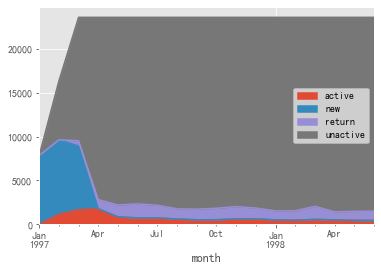

In [59]:
purchase_status_ct.T.fillna(0).plot.area()


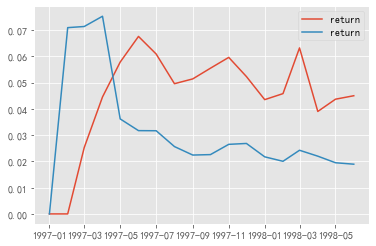

In [60]:
#return percentage
rate = purchase_status_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis = 1)
plt.plot(rate['return'],label = 'return')
plt.plot(rate['active'],label = 'return')

plt.legend()

In [61]:
#Ordering Period

order_diff = df.groupby(by = 'user_id').apply(lambda x:x['order_date']-x['order_date'].shift())
order_diff.head(20)



user_id    
1        0         NaT
2        1         NaT
         2      0 days
3        3         NaT
         4     87 days
         5      3 days
         6    227 days
         7     10 days
         8    184 days
4        9         NaT
         10    17 days
         11   196 days
         12   132 days
5        13        NaT
         14    13 days
         15    21 days
         16    66 days
         17    50 days
         18    16 days
         19    36 days
Name: order_date, dtype: timedelta64[ns]

In [62]:
df.groupby(by = 'user_id').head(10)

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
...,...,...,...,...,...,...
69654,23568,19970405,4,83.74,1997-04-05,1997-04-01
69655,23568,19970422,1,14.99,1997-04-22,1997-04-01
69656,23569,19970325,2,25.74,1997-03-25,1997-03-01
69657,23570,19970325,3,51.12,1997-03-25,1997-03-01


<AxesSubplot:>

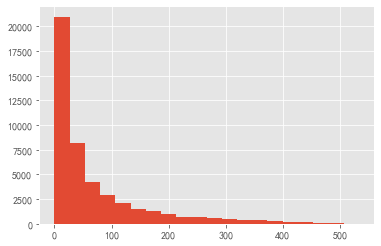

In [63]:
(order_diff/np.timedelta64(1,'D')).hist(bins = 20)

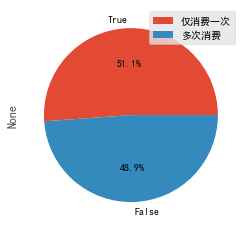

In [64]:
#consuming life period
user_life=df.groupby('user_id')['order_date'].agg(['min','max'])
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct = '%1.1f%%')
plt.legend(['仅消费一次','多次消费'])

In [65]:
(user_life['max']-user_life['min']).describe()

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

Text(0, 0.5, '用户人数')

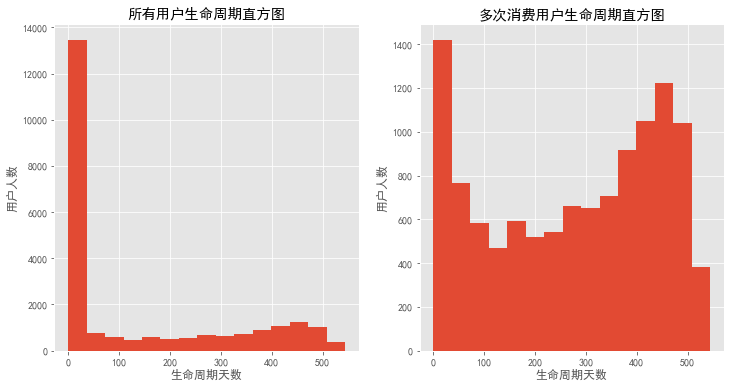

In [66]:
plt.figure(figsize = (12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins = 15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')


plt.subplot(122)
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins = 15)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')


month
1997-01-01     844.0
1997-02-01    1178.0
1997-03-01    1479.0
1997-04-01     631.0
1997-05-01     436.0
1997-06-01     458.0
1997-07-01     469.0
1997-08-01     355.0
1997-09-01     352.0
1997-10-01     380.0
1997-11-01     410.0
1997-12-01     410.0
1998-01-01     324.0
1998-02-01     315.0
1998-03-01     473.0
1998-04-01     286.0
1998-05-01     298.0
1998-06-01     323.0
dtype: float64

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64


<AxesSubplot:xlabel='month'>

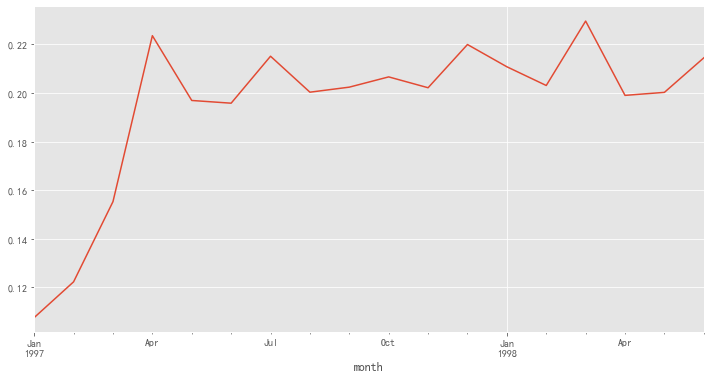

In [67]:
#复购率 
#In one month
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x ==0 else 0)
purchase_r.head()
print(purchase_r.sum())
print()
print(purchase_r.count())

(purchase_r.sum()/purchase_r.count()).plot(figsize = (12,6))

In [68]:
#回购率 在时间窗口内  这里为1个月
def purchase_back(data):
    status=[]
    #1.回购用户  0.非回购用户（当月消费，下个月未消费） NaN：当前月分未消费
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            elif data[i+1] ==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,df_purchase.columns)
        
purchase_b = df_purchase.apply(purchase_back,axis = 1)
purchase_b.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


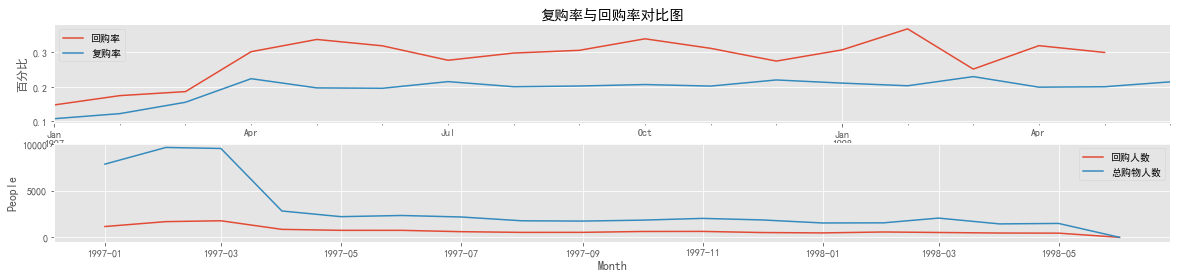

In [70]:
plt.figure(figsize = (20,4))
plt.subplot(211)

(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
(purchase_r.sum()/purchase_r.count()).plot(label='复购率')
plt.legend()
plt.title('复购率与回购率对比图')
plt.ylabel('百分比')



plt.subplot(212)
plt.plot(purchase_b.sum(),label= '回购人数')
plt.plot(purchase_b.count(),label ='总购物人数')
plt.xlabel('Month')
plt.ylabel('People')
plt.legend()